In [ ]:
import numpy as np
import math
from summary import Summary

In [461]:
def main():
    data = np.random.rand(10000)
    eps = 0.01

    n_list, s_list = [], []
    quantile_list = []

    summary = Summary(eps)
    summary.insert(data[0])
    for i in range(1, len(data)):

        if i%50==0:
            s_list.append(summary.s)
            n_list.append(summary.n)
            quantile_list.append([np.quantile(data, 0.3), summary.quantile(0.3)])

        if summary.n%(1/(2*eps))==0:
            summary.compress()
        summary.insert(data[i])

    numpy_q, calculated_q = np.array(quantile_list).reshape(2, len(n_list))
    mse = ((numpy_q-calculated_q)**2).mean()
    print("MSE error:", mse)
    
    return n_list, s_list

In [462]:
for i in range(10):
    n_list, s_list = main()

MSE error: 0.033825303831173256
MSE error: 0.07106255433865555
MSE error: 0.0006914541639309826
MSE error: 0.002878815728979181
MSE error: 0.0021174182562151613
MSE error: 0.032043537389335276
MSE error: 0.0005638151210317915
MSE error: 0.007848151923469238
MSE error: 0.09270409954048761
MSE error: 0.003799225463303355


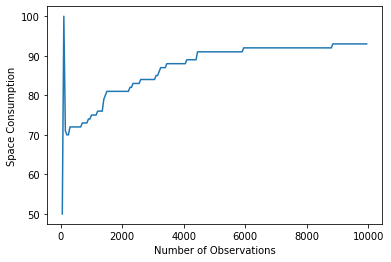

In [454]:
import matplotlib.pyplot as plt

plt.plot(n_list, s_list)
plt.xlabel('Number of Observations')
plt.ylabel('Space Consumption')
plt.show()

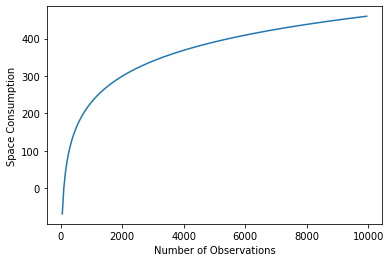

In [455]:
eps = 0.01
space = [1/eps*math.log(eps*n) for n in n_list]
plt.plot(n_list, space)
plt.xlabel('Number of Observations')
plt.ylabel('Space Consumption')
plt.show()